## Houston - House Price Index vs Energy Industry
----

### Analysis
* This study shall focus on the correlation between fluctuations in oil and gas prices and the strength of the correlation with house prices in Houston.
* Houston is the oil and gas capital of the USA - and it would be interesting to investigate the impact of oil prices on the local economy with respect to the housing market.
* In addition to focussing on the city of Houston, other major cities in Texas, such as Dallas and Austin shall be used to confirm the strength of the impact emanating from the energy industry.
* A comparison of the labor market involved in the oil/gas sector by each of the cities is a good starting point on which to base the argument.

---

#### Note
* The FRED API shall be utilized for gathering the data.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

# Import API key
import config
from config import api_key

# Output File (CSV)
output_data_file = "output_data/quarter_data.csv"
output_data_file_2 = "output_data/annual_data.csv"


In [57]:
# New Dependency! Use this to pretty print the JSON
# https://docs.python.org/3/library/pprint.html
from pprint import pprint

In [76]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
q_dict = {'ATNHPIUS12420Q': 'House Price Index for Austin',
          'AUST448URN':'Unemployment Rate in Austin',
          #Thousands of Persons (monthly), 
           'AUST448NRMN': 'Mining, Logging, and Construction',
           'AUST448MFG': 'Manufacturing',
           'AUST448TRAD': 'Trade, Transportation, and Utilities',
           'AUST448FIRE': 'Financial Activities',
           'AUST448PBSV': 'Professional and Business Services',
           'AUST448EDUH': 'Education and Health Services',          
           'AUST448LEIH': 'Leisure and Hospitality',
           'AUST448GOVT': 'Government',
           #Dollars (monthly)
           'WTISPLC': 'Global price of WTI Crude',
           #Percent (monthly)
           'MORTGAGE30US': '30Yr Fixed Mortgage Rate',
           #CPI (monthly)
           }

# Include start date, API key from config.py file and file type json
start_date = '1990-01-02'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2018-09-02'
e_dates = '&observation_end={}'.format(end_date)

api_key = '&api_key={}'.format(config.api_key)

ftype = '&file_type=json'
frequency = 'q'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [78]:
df = pd.DataFrame()
for code, name in q_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.tail(5)

,House Price Index for Austin,Unemployment Rate in Austin,"Mining, Logging, and Construction",Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Global price of WTI Crude,30Yr Fixed Mortgage Rate
2017-07-01,311.55,3.2,61.8,57.5,177.7,60.2,176.8,121.1,125.7,179.7,48.163,3.88
2017-10-01,313.5,2.7,61.9,57.7,178.9,60.7,181.9,120.9,129.3,177.5,55.367,3.92
2018-01-01,318.32,3.0,63.8,58.3,183.1,61.2,185.0,121.6,130.2,178.0,62.887,4.28
2018-04-01,326.51,2.9,64.2,58.0,185.4,61.8,185.3,120.7,132.9,178.2,68.033,4.54
2018-07-01,332.13,3.0,66.9,57.5,187.6,61.9,186.5,120.0,134.3,179.2,69.757,4.57


In [79]:
# List of FRED series IDs and their description
a_dict = {'AUST448PCPI':'Per Capita Personal Income - Austin',#2001 (annual)
          # 
          # Population and Unemployment is annual only
           'TXTRAV3POP':'Population in Travis County',
           'TXCALD5POP':'Population in Caldwell County',
           'TXHAYS9POP':'Population in Hays County',
           'TXBAST1POP':'Population in Bastrop County',
           'TXWILL5POP':'Population in Williamson County'
           }

# Include start date, API key from config.py file and file type json
start_date = '2002-01-02'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-02'
e_dates = '&observation_end={}'.format(end_date)
api_key = '&api_key={}'.format(config.api_key)
ftype = '&file_type=json'
frequency = 'a'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [80]:
dff = pd.DataFrame()
for code, name in a_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    dff[name] = [i['value'] for i in r]
dff.index = pd.to_datetime([i['date'] for i in r])
dff.head(5)

,Per Capita Personal Income - Austin,Population in Travis County,Population in Caldwell County,Population in Hays County,Population in Bastrop County,Population in Williamson County
2002-01-01,34065,852.577,34.627,112.322,63.761,290.157
2003-01-01,33888,862.554,35.193,116.872,66.181,302.881
2004-01-01,33777,878.681,36.010,120.806,67.566,316.391
2005-01-01,36089,900.945,36.139,126.927,68.773,331.866
2006-01-01,38679,936.989,36.232,133.875,70.369,351.532


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### House Price Index vs. Oil Price

In [81]:
x1_axis = df.index.values
x2_axis =dff.index.values

In [82]:
df.dtypes
cols = df.columns[df.dtypes.eq(object)]
cols
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df.dtypes

House Price Index for Austin            float64
Unemployment Rate in Austin             float64
Mining, Logging, and Construction       float64
Manufacturing                           float64
Trade, Transportation, and Utilities    float64
Financial Activities                    float64
Professional and Business Services      float64
Education and Health Services           float64
Leisure and Hospitality                 float64
Government                              float64
Global price of WTI Crude               float64
30Yr Fixed Mortgage Rate                float64
dtype: object

In [83]:
dff.dtypes
cols = dff.columns[dff.dtypes.eq(object)]
cols
for d in cols:
    dff[d] = pd.to_numeric(dff[d], errors='coerce')
dff.dtypes

Per Capita Personal Income - Austin      int64
Population in Travis County            float64
Population in Caldwell County          float64
Population in Hays County              float64
Population in Bastrop County           float64
Population in Williamson County        float64
dtype: object

In [84]:
df.to_csv(output_data_file)
dff.to_csv(output_data_file_2)

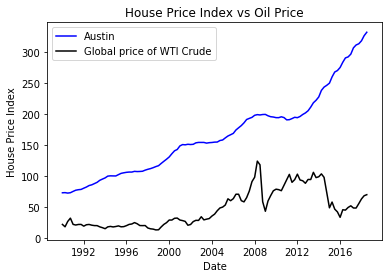

In [85]:
x1_axis = df.index.values

#plt.plot(x_axis, y_axis)
plt.plot(x1_axis, df["House Price Index for Austin"],color="blue", label="Austin" )
plt.plot(x1_axis, df["Global price of WTI Crude"],color='black')

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

#plt.savefig("Latitude_v_MaxTemp.png")
plt.savefig("House price Index vs WTI Oil Price.png")
plt.show()

In [86]:
df['MA'] = df.rolling(window=3)["Global price of WTI Crude"].mean()
#df.head()

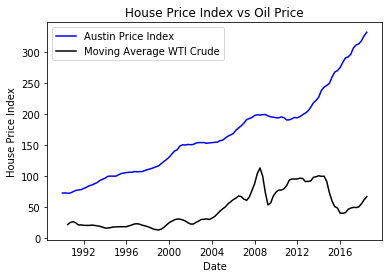

In [87]:
plt.plot(x1_axis, df["House Price Index for Austin"],color="blue", label="Austin Price Index" )
plt.plot(x1_axis, df["MA"],color='black',label = "Moving Average WTI Crude")

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

plt.savefig("House price Index vs MA WTA Oil Price.png")
plt.show()


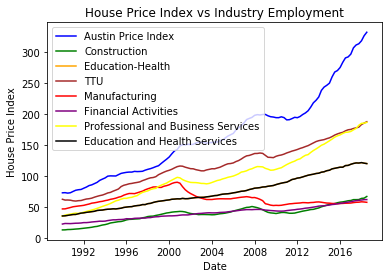

In [88]:
plt.plot(x1_axis, df["House Price Index for Austin"],color="blue", label="Austin Price Index" )
plt.plot(x1_axis, df["Mining, Logging, and Construction"],color="green", label="Construction" )
plt.plot(x1_axis, df["Education and Health Services"],color="orange", label="Education-Health" )
plt.plot(x1_axis, df["Trade, Transportation, and Utilities"],color="brown", label="TTU" )
plt.plot(x1_axis, df["Manufacturing"],color="red", label="Manufacturing" )
plt.plot(x1_axis, df["Financial Activities"],color="purple", label="Financial Activities" )
plt.plot(x1_axis, df["Professional and Business Services"],color="yellow", label="Professional and Business Services" )
plt.plot(x1_axis, df["Education and Health Services"],color="black", label="Education and Health Services" )

plt.legend(loc="best")

plt.title(f"House Price Index vs Industry Employment")
plt.ylabel("House Price Index")
plt.xlabel("Date")

plt.savefig("House Price Index vs Industry Employment")
plt.show()

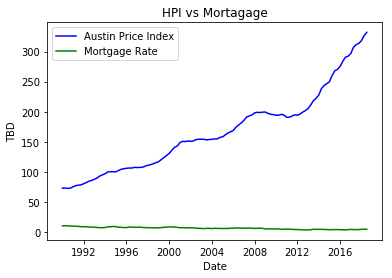

In [91]:
plt.plot(x1_axis, df["House Price Index for Austin"],color="blue", label="Austin Price Index" )
plt.plot(x1_axis, df["30Yr Fixed Mortgage Rate"],color="green", label="Mortgage Rate" )

plt.legend(loc="best")

plt.title(f"HPI vs Mortagage")
plt.ylabel("TBD")
plt.xlabel("Date")

plt.savefig("HPI vs Mortagage")
plt.show()

In [92]:
dff.head()

,Per Capita Personal Income - Austin,Population in Travis County,Population in Caldwell County,Population in Hays County,Population in Bastrop County,Population in Williamson County
2002-01-01,34065,852.577,34.627,112.322,63.761,290.157
2003-01-01,33888,862.554,35.193,116.872,66.181,302.881
2004-01-01,33777,878.681,36.010,120.806,67.566,316.391
2005-01-01,36089,900.945,36.139,126.927,68.773,331.866
2006-01-01,38679,936.989,36.232,133.875,70.369,351.532


In [93]:
dff.columns
dff['Austin_Population']=dff['Population in Travis County']\
                        +dff['Population in Caldwell County']\
                        +dff['Population in Hays County']\
+dff['Population in Bastrop County']\
+dff['Population in Williamson County']\

dff.tail()


,Per Capita Personal Income - Austin,Population in Travis County,Population in Caldwell County,Population in Hays County,Population in Bastrop County,Population in Williamson County,Austin_Population
2013-01-01,47260,1121.960,39.205,176.019,75.896,470.448,1883.528
2014-01-01,50171,1151.387,39.693,184.871,77.919,488.385,1942.255
2015-01-01,51717,1178.292,40.377,194.497,80.198,507.420,2000.784
2016-01-01,52926,1204.582,41.108,204.345,82.754,527.769,2060.558
2017-01-01,54817,1226.698,42.338,214.485,84.761,547.545,2115.827


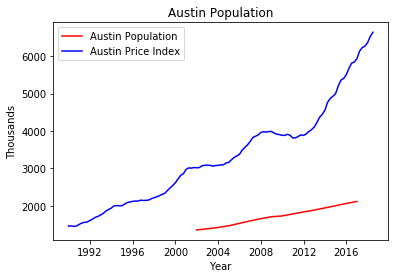

In [94]:
x2_axis =dff.index.values
plt.plot(x2_axis, dff["Austin_Population"],color="red", label="Austin Population" )
plt.plot(x1_axis, df["House Price Index for Austin"].values*20,color="blue", label="Austin Price Index" )
plt.legend(loc="best")

plt.title(f"Austin Population")
plt.ylabel("Thousands")
plt.xlabel("Year")

plt.savefig("Austin Population")
plt.show()

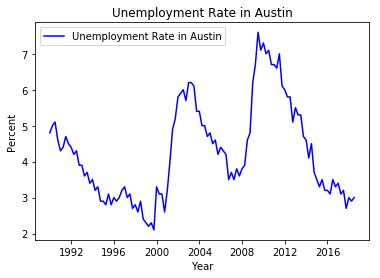

In [96]:
plt.plot(x1_axis, df["Unemployment Rate in Austin"],color="blue", label="Unemployment Rate in Austin" )

plt.legend(loc="best")

plt.title(f"Unemployment Rate in Austin")
plt.ylabel("Percent")
plt.xlabel("Year")

plt.savefig("Unemployment Rate in Austin")
plt.show()